In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter

%matplotlib inline

In [3]:
apple = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv')
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


In [4]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8465 non-null   object 
 1   Open       8465 non-null   float64
 2   High       8465 non-null   float64
 3   Low        8465 non-null   float64
 4   Close      8465 non-null   float64
 5   Volume     8465 non-null   int64  
 6   Adj Close  8465 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 463.1+ KB


In [5]:
apple.shape

(8465, 7)

### Check out the type of the columns.

In [6]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Transform the Date column as a datetime type.

In [7]:
apple['Date'] = pd.to_datetime(apple['Date'])

In [8]:
apple.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

### Set the date as the index.

In [11]:
apple = apple.set_index(apple['Date'])

apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,,
2014-07-08,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Is there any duplicate dates?

In [14]:
apple.index.duplicated().sum() # 중복된 인덱스의 개수

0

In [15]:
apple.index.is_unique # 인덱스가 고유한지 확인 

True

### Ops... it seems the index is from the most recent date. Make the first entry the oldest date.

In [16]:
apple.sort_index(ascending=True).head()

,Date,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,,
1980-12-12,1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


### Get the last business day of each month.

In [21]:
# 매월의 마지막 영업일

last_day = apple.resample('BM').mean()
# 비즈니스 월별(Business Month): 각 월의 마지막 영업일(주말 제외) 기준으로 리샘플링

last_day.head()

# .resample()을 실행하면 DatetimeIndexResampler 객체를 반환 → 이 객체는 아직 데이터가 처리되지 않은 상태
# 따라서, head()를 직접 사용할 수 없음 (집계함수를 먼저 실행해야 사용 가능)

,Date,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,,
1980-12-31,1980-12-21 16:36:55.384615360,30.481538,30.567692,30.443077,30.443077,2.586252e+07,0.473077
1981-01-30,1981-01-16 18:17:08.571428544,31.754762,31.826667,31.654762,31.654762,7.249867e+06,0.493810
1981-02-27,1981-02-14 10:06:18.947368448,26.480000,26.572105,26.407895,26.407895,4.231832e+06,0.411053
1981-03-31,1981-03-15 22:54:32.727272704,24.937727,25.016818,24.836364,24.836364,7.962691e+06,0.387727
1981-04-30,1981-04-15 14:51:25.714285696,27.286667,27.368095,27.227143,27.227143,6.392000e+06,0.423333


- **M(월별, Monthly)**: 각 월의 마지막 날을 기준으로 리샘플링
- **A(연도별, Annual)**: 각 연도의 마지막 날을 기준으로 리샘플링 

### What is the difference in days between the first day and the oldest.

In [22]:
day_differ = apple.index.max() - apple.index.min()
day_differ.days

12261

- **days**: 날짜 차이 객체에서 일 단위의 차이를 반환하는 속성 **(두 날짜 간의 차이를 days 단위로 반환)**

### How many months in the data we have?

In [25]:
apple_month = apple.resample('BM').mean() # => 왜 mean()이 아닌, sum()은 안되는가?
apple_month

,Date,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,,
1980-12-31,1980-12-21 16:36:55.384615360,30.481538,30.567692,30.443077,30.443077,2.586252e+07,0.473077
1981-01-30,1981-01-16 18:17:08.571428544,31.754762,31.826667,31.654762,31.654762,7.249867e+06,0.493810
1981-02-27,1981-02-14 10:06:18.947368448,26.480000,26.572105,26.407895,26.407895,4.231832e+06,0.411053
1981-03-31,1981-03-15 22:54:32.727272704,24.937727,25.016818,24.836364,24.836364,7.962691e+06,0.387727
1981-04-30,1981-04-15 14:51:25.714285696,27.286667,27.368095,27.227143,27.227143,6.392000e+06,0.423333
...,...,...,...,...,...,...,...
2014-03-31,2014-03-16 05:42:51.428571392,533.593333,536.453810,530.070952,533.214286,5.954403e+07,75.750000
2014-04-30,2014-04-15 04:34:17.142857216,540.081905,544.349048,536.262381,541.074286,7.660787e+07,76.867143
2014-05-30,2014-05-15 13:42:51.428571392,601.301905,606.372857,598.332857,603.195714,6.828177e+07,86.058571


### Plot the 'Adi Close' value. Set the size of the figure to 13.5 x 9 inches.

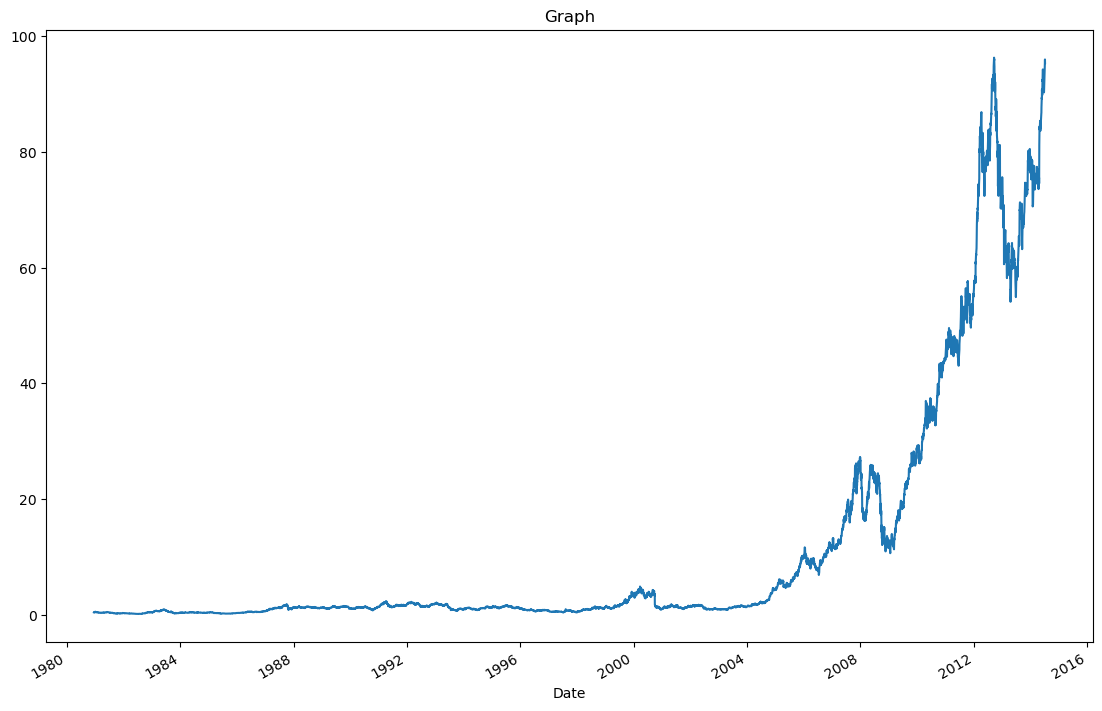

In [28]:
plot = apple['Adj Close'].plot(title = 'Graph')

fig = plot.get_figure() # seaborn에서 생성한 그래프를 matploblib의 figure 객체로 변환하는 함수
fig.set_size_inches(13.5, 9)